# TASK : 2 SUPERVISED LEARNING

In [85]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.metrics import accuracy_score

# 1. IMPORTING DATA

In [86]:
url="http://bit.ly/w-data"
students = pd.read_csv(url)

In [87]:

students.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [88]:
students.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# 2.MISSING VALUE

In [89]:
students.isnull().sum()

Hours     0
Scores    0
dtype: int64

# 3.SHUFFLING & CREATING TRAIN AND TEST SET

In [90]:
from sklearn.utils import shuffle

students=shuffle(students,random_state=42)
div=int(students.shape[0]/4)
train=students.loc[:3*div+1,:]
test=students.loc[3*div+1:]

train.shape,test.shape

((24, 2), (2, 2))

In [91]:
train.head()

,Hours,Scores
8,8.3,81
16,2.5,30
0,2.5,21
23,6.9,76
11,5.9,62


In [92]:
test.head()

,Hours,Scores
19,7.4,69
6,9.2,88


# 4.SIMPLE MODE

In [93]:
test["simple_mode"]=train["Scores"].mode()[0]
test["simple_mode"].head()

C:\Users\ravip\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


19    30
6     30
Name: simple_mode, dtype: int64

In [94]:
simple_mode_accuracy=accuracy_score(test["Scores"],test["simple_mode"])
simple_mode_accuracy

0.0

In [95]:
x=students.drop(["Scores"],axis=1)
y=students["Scores"]
x.shape,y.shape

((25, 1), (25,))

# 5.PREPARING THE DATA

In [ ]:

X = students['Hours'].values.reshape(-1,1) 
y = students['Scores'].values

# 6.SPLITTING TRAINING &TEST SET

In [97]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# 7.IMPLEMENTING LINEAR REGRESSION

In [98]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:

X_test 
y_pred = lr.predict(X_test)

In [100]:
students = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
students

,Actual,Predicted
0,24,21.189864
1,27,33.812497
2,17,13.422091
3,86,78.477196
4,47,52.260959


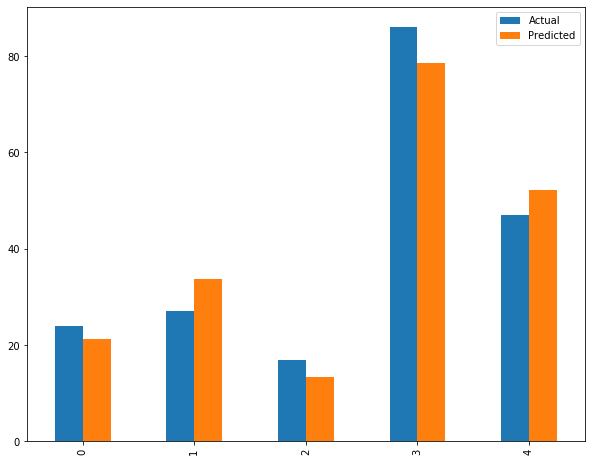

In [101]:
students.plot.bar(figsize=(10,8))

# 8. PREDICTION BASED ON HOUR

In [102]:
hours = 9.25
pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 92.5562856994045


# 9.PREDICTING ERROR

In [103]:
from sklearn.metrics import mean_absolute_error as mae

In [104]:
# prdiction  over trains set and calculatin error
train_predict=lr.predict(X_train)
k=mae(train_predict,y_train)
print("Train Mean Absolute Error",k)

Train Mean Absolute Error 4.9042361846559865


In [105]:
# prdiction  over trains set and calculatin error
test_predict=lr.predict(X_test)
k=mae(test_predict,y_test)
print("Test Mean Absolute Error",k)

Test Mean Absolute Error 5.19686105661557


# 10.DATA VISUALISATION

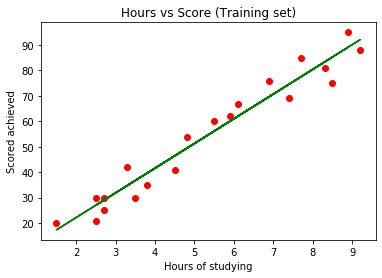

In [106]:
# TRAINING SET
plt.scatter(X_train,y_train, color = 'r')
plt.plot(X_train, lr.predict(X_train), color = 'g')
plt.title('Hours vs Score')
plt.xlabel('STUDYING HOURS')
plt.ylabel('GAINED SCORES')
plt.show()

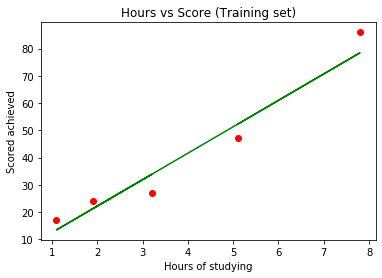

In [107]:
#TESTING SET
plt.scatter(X_test,y_test ,color = 'r')
plt.plot(X_test, lr.predict(X_test), color = 'g')
plt.title('Hours vs Score ')
plt.xlabel('STUDYING HOURS')
plt.ylabel('GAINED SCORES')
plt.show()

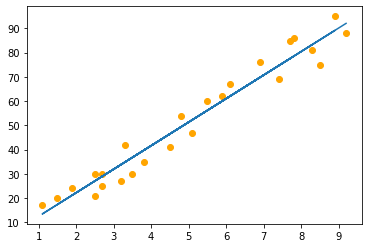

In [108]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y,color="orange")
plt.plot(X, line);
plt.show()

In [109]:
lr.coef_

array([9.70971718])

In [114]:
lr.intercept_

2.7414017604471965

In [115]:
lr.score(X_test,y_test) 

0.9514625220709427